# Training of the logistic regression model with the below conditions.

Condition -1 >   Source_Z = "VI"      - To filter out all the correct data points with Z_VI as a bench mark

Condition -2 >   Z_VI > 0.002  -  Condition for finding the data points which are visually observed.

Outlier condition > abs[(" Z_VI - Z_PIPE") >0.1 * (1+"Z_VI")]

Inlier condition > abs[(" Z_VI - Z_PIPE”) <0.05 * (1+"Z_VI”)]





# Reading the QR 16 catalog data.

In [34]:
import numpy as np  # it take care of all the arrays and mathematical operation in the fits files. 
from astropy.table import Table # for reading fits files.
import pandas as pd 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import random
import seaborn as sns
from sklearn import preprocessing
from collections import Counter
import warnings 
warnings.filterwarnings("ignore", category =DeprecationWarning)
import seaborn as sns

file = Table.read("DR16Q_v4.fits" )  # opening the fits files


"""
F = file['Z_VI', 'Z_PIPE']
file.add_index('Z_VI')
file
file
F_D = file[file['Z_VI'] >= 0]  # All the data whose Z_VI >= 0 
F_D[:2]
file.columns      # to call all the names of columns.
now we can get the information about the fits files from below code

"""
file.columns

<TableColumns names=('SDSS_NAME','RA','DEC','PLATE','MJD','FIBERID','AUTOCLASS_PQN','AUTOCLASS_DR14Q','IS_QSO_QN','Z_QN','RANDOM_SELECT','Z_10K','Z_CONF_10K','PIPE_CORR_10K','IS_QSO_10K','THING_ID','Z_VI','Z_CONF','CLASS_PERSON','Z_DR12Q','IS_QSO_DR12Q','Z_DR7Q_SCH','IS_QSO_DR7Q','Z_DR6Q_HW','Z_DR7Q_HW','IS_QSO_FINAL','Z','SOURCE_Z','Z_PIPE','ZWARNING','OBJID','Z_PCA','ZWARN_PCA','DELTACHI2_PCA','Z_HALPHA','ZWARN_HALPHA','DELTACHI2_HALPHA','Z_HBETA','ZWARN_HBETA','DELTACHI2_HBETA','Z_MGII','ZWARN_MGII','DELTACHI2_MGII','Z_CIII','ZWARN_CIII','DELTACHI2_CIII','Z_CIV','ZWARN_CIV','DELTACHI2_CIV','Z_LYA','ZWARN_LYA','DELTACHI2_LYA','Z_LYAWG','Z_DLA','NHI_DLA','CONF_DLA','BAL_PROB','BI_CIV','ERR_BI_CIV','AI_CIV','ERR_AI_CIV','BI_SIIV','ERR_BI_SIIV','AI_SIIV','ERR_AI_SIIV','BOSS_TARGET1','EBOSS_TARGET0','EBOSS_TARGET1','EBOSS_TARGET2','ANCILLARY_TARGET1','ANCILLARY_TARGET2','NSPEC_SDSS','NSPEC_BOSS','NSPEC','PLATE_DUPLICATE','MJD_DUPLICATE','FIBERID_DUPLICATE','SPECTRO_DUPLICATE','SKYVERSION

In [35]:
DF = file['Z_PIPE','ZWARNING','Z_PCA','ZWARN_PCA','DELTACHI2_PCA','Z','Z_HALPHA','ZWARN_HALPHA','DELTACHI2_HALPHA','Z_HBETA','ZWARN_HBETA','DELTACHI2_HBETA','Z_MGII','ZWARN_MGII','DELTACHI2_MGII','Z_CIII','ZWARN_CIII','DELTACHI2_CIII','Z_CIV','ZWARN_CIV','DELTACHI2_CIV','Z_LYA','ZWARN_LYA','DELTACHI2_LYA','Z_LYAWG','BAL_PROB','BI_CIV','ERR_BI_CIV','AI_CIV','ERR_AI_CIV','BI_SIIV','ERR_BI_SIIV','AI_SIIV','Z_VI','SOURCE_Z']
DF['Z_VI-Z_PIPE'] = abs(DF['Z_VI'] -DF['Z_PIPE'])
df_0 = DF
df_0

Z_PIPE,ZWARNING,Z_PCA,ZWARN_PCA,DELTACHI2_PCA,Z,Z_HALPHA,ZWARN_HALPHA,DELTACHI2_HALPHA,Z_HBETA,ZWARN_HBETA,DELTACHI2_HBETA,Z_MGII,ZWARN_MGII,DELTACHI2_MGII,Z_CIII,ZWARN_CIII,DELTACHI2_CIII,Z_CIV,ZWARN_CIV,DELTACHI2_CIV,Z_LYA,ZWARN_LYA,DELTACHI2_LYA,Z_LYAWG,BAL_PROB,BI_CIV,ERR_BI_CIV,AI_CIV,ERR_AI_CIV,BI_SIIV,ERR_BI_SIIV,AI_SIIV,Z_VI,SOURCE_Z,Z_VI-Z_PIPE
float64,int32,float64,int64,float64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,bytes12,float64
0.8454347848892212,0,0.845751479344974,0,16996.66972831516,0.8454347848892212,-1.0,7682,0.0,0.8436375149058963,0,156.43772375163678,0.8428504859071788,0,750.8834989041113,0.8940224387238764,2050,21.324610028391675,-1.0,7682,0.0,-1.0,7682,0.0,0.84575146,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,PIPE,1.8454347848892212
2.035491466522217,0,2.0344430019020106,0,522.7567574737077,2.035491466522217,-1.0,7682,0.0,-1.0,7682,0.0,2.0517068015079523,0,36.65111428584561,2.0140677564448497,0,17.77954054107221,2.0079091130528393,0,94.93493230811634,2.037936700312481,0,59.69074975107185,2.030835,0.9,0.0,0.0,143.46597290039062,6.538216590881348,0.0,0.0,0.0,-1.0,PIPE,3.035491466522217
1.5742274522781372,0,1.5748324669819411,0,395.17112356819234,1.5742274522781372,-1.0,7682,0.0,-1.0,7682,0.0,1.571394626776076,0,51.26856655958335,1.57383165321738,0,28.665405762936928,1.5893603661422095,0,121.69651782476126,-1.0,7682,0.0,1.5748324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,PIPE,2.574227452278137
1.7705516815185547,0,1.7711350379809114,0,410.12555811197035,1.7705516815185547,-1.0,7682,0.0,-1.0,7682,0.0,1.7702794429839241,0,21.87843562643343,1.7558669284907311,0,22.79849258331683,1.7673499491247613,0,94.47670636372106,-1.0,7682,0.0,1.7716389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,PIPE,2.7705516815185547
2.024146318435669,0,2.0259091237511564,0,26576.813852902626,2.024146318435669,-1.0,7682,0.0,-1.0,7682,0.0,2.036802201236187,0,712.5588206441782,2.0309983965987133,0,673.5819974202324,2.021040762631008,0,3658.945308889662,2.032103120491116,0,1380.504531362969,2.0266654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,PIPE,3.024146318435669
2.30739688873291,0,2.309822022231934,0,2041.8610573860806,2.309,-1.0,7682,0.0,-1.0,7682,0.0,2.30940086657011,0,31.778644420711572,2.306577112455882,0,34.69502642980575,2.2925674836007754,0,269.797993856516,2.3111845575852,0,662.8146161377567,2.3082442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.309,VI,0.0016031112670900072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.4156601428985596,0,2.4124468414693605,0,2715.9182501026844,2.415,-1.0,7682,0.0,-1.0,7682,0.0,2.4074049589748765,0,17.823479582224593,2.411733869675933,0,92.84688953515018,2.415362306852677,0,397.0780372854995,2.411732291697624,0,861.8414965614411,2.4136548,0.9,0.0,0.0,536.2689208984375,14.119608879089355,0.0,0.0,312.070556640625,2.415,VI,0.0006601428985595348
1.4903559684753418,0,1.4906091512796538,0,1799.4691560289366,1.4903559684753418,-1.0,7682,0.0,-1.0,7682,0.0,1.487470928561316,0,144.97483284840263,1.4858982477761389,0,144.03379660054935,1.4898702127900556,0,340.9633689361833,-1.0,7682,0.0,1.4906092,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,PIPE,2.490355968475342


# Condition SOURCE_Z == VI

In [6]:
df_con1 = df_0[(df_0['SOURCE_Z']== ['VI'])]
df_con1

Z_PIPE,ZWARNING,Z_PCA,ZWARN_PCA,DELTACHI2_PCA,Z,Z_HALPHA,ZWARN_HALPHA,DELTACHI2_HALPHA,Z_HBETA,ZWARN_HBETA,DELTACHI2_HBETA,Z_MGII,ZWARN_MGII,DELTACHI2_MGII,Z_CIII,ZWARN_CIII,DELTACHI2_CIII,Z_CIV,ZWARN_CIV,DELTACHI2_CIV,Z_LYA,ZWARN_LYA,DELTACHI2_LYA,Z_LYAWG,BAL_PROB,BI_CIV,ERR_BI_CIV,AI_CIV,ERR_AI_CIV,BI_SIIV,ERR_BI_SIIV,AI_SIIV,Z_VI,SOURCE_Z,Z_VI-Z_PIPE
float64,int32,float64,int64,float64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,bytes12,float64
2.30739688873291,0,2.309822022231934,0,2041.8610573860806,2.309,-1.0,7682,0.0,-1.0,7682,0.0,2.30940086657011,0,31.778644420711572,2.306577112455882,0,34.69502642980575,2.2925674836007754,0,269.797993856516,2.3111845575852,0,662.8146161377567,2.3082442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.309,VI,0.0016031112670900072
0.2499377280473709,0,0.2499664631139367,0,10312.022277614225,0.25,0.2502658034466343,0,2179.694191994025,0.2502945933897358,0,190.91675535334383,0.2860996637464366,2050,12.950350286831277,-1.0,7682,0.0,-1.0,7682,0.0,-1.0,7682,0.0,0.24996646,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.25,VI,6.227195262908936e-05
2.497960329055786,0,2.495224574735003,0,4279.918210569369,2.497,-1.0,7682,0.0,-1.0,7682,0.0,2.512824164931536,0,37.54399460219483,2.483751897812517,0,71.68050159068986,2.4945086598323947,0,428.5430142735212,2.495946111809488,0,1247.403767220968,2.4981523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.43513870239258,2.497,VI,0.0009603290557862465
1.6176164150238037,0,1.617289246338699,0,2050.7362655851484,1.619,-1.0,7682,0.0,-1.0,7682,0.0,1.6327167898608819,0,230.45846937694216,1.6279554504175815,0,271.1497976869921,1.6047026359248524,0,352.6514907869778,-1.0,7682,0.0,1.6172893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.619,VI,0.0013835849761962837
1.3597235679626465,0,1.3608132894867597,0,9258.567132871472,1.36,-1.0,7682,0.0,-1.0,7682,0.0,1.3593339869053747,0,1211.1399283497435,1.3588637984799892,0,938.3154917369859,1.3698082824944566,0,104.3035878386575,-1.0,7682,0.0,1.3608133,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.36,VI,0.0002764320373536133
2.3330492973327637,0,2.3324270241186236,0,18282.945960215282,2.328,-1.0,7682,0.0,-1.0,7682,0.0,2.34335257901786,0,13.45716643069386,2.334735793129369,0,345.73495835305187,2.329903291663351,0,2685.5916235639224,2.333911372178771,0,7404.313150987138,2.333821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.328,VI,0.005049297332763825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.1797664165496826,0,2.177395252974738,0,774.1343318844292,2.199,-1.0,7682,0.0,-1.0,7682,0.0,2.1663598054426285,0,7.914716460159013,2.2049538984587556,0,10.999966672160497,2.1813152775835043,0,63.927614154009234,2.214936199239272,0,138.70714421537537,2.219773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.199,VI,0.019233583450317226
2.438377618789673,0,2.435264652930172,0,6632.039163108646,2.439,-1.0,7682,0.0,-1.0,7682,0.0,2.4588539986009152,0,16.095318501577935,2.40985430280184,0,29.146762069588988,2.411492248793458,0,411.2203851466047,2.439241189207989,0,3022.4771029301464,2.4470756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,219.5832061767578,2.439,VI,0.0006223812103272053


# Z_VI >= 0.002

In [9]:
df_con2 = df_con1[df_con1['Z_VI']>=0.002]
df_con2

Z_PIPE,ZWARNING,Z_PCA,ZWARN_PCA,DELTACHI2_PCA,Z,Z_HALPHA,ZWARN_HALPHA,DELTACHI2_HALPHA,Z_HBETA,ZWARN_HBETA,DELTACHI2_HBETA,Z_MGII,ZWARN_MGII,DELTACHI2_MGII,Z_CIII,ZWARN_CIII,DELTACHI2_CIII,Z_CIV,ZWARN_CIV,DELTACHI2_CIV,Z_LYA,ZWARN_LYA,DELTACHI2_LYA,Z_LYAWG,BAL_PROB,BI_CIV,ERR_BI_CIV,AI_CIV,ERR_AI_CIV,BI_SIIV,ERR_BI_SIIV,AI_SIIV,Z_VI,SOURCE_Z,Z_VI-Z_PIPE
float64,int32,float64,int64,float64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,bytes12,float64
2.30739688873291,0,2.309822022231934,0,2041.8610573860806,2.309,-1.0,7682,0.0,-1.0,7682,0.0,2.30940086657011,0,31.778644420711572,2.306577112455882,0,34.69502642980575,2.2925674836007754,0,269.797993856516,2.3111845575852,0,662.8146161377567,2.3082442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.309,VI,0.0016031112670900072
0.2499377280473709,0,0.2499664631139367,0,10312.022277614225,0.25,0.2502658034466343,0,2179.694191994025,0.2502945933897358,0,190.91675535334383,0.2860996637464366,2050,12.950350286831277,-1.0,7682,0.0,-1.0,7682,0.0,-1.0,7682,0.0,0.24996646,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.25,VI,6.227195262908936e-05
2.497960329055786,0,2.495224574735003,0,4279.918210569369,2.497,-1.0,7682,0.0,-1.0,7682,0.0,2.512824164931536,0,37.54399460219483,2.483751897812517,0,71.68050159068986,2.4945086598323947,0,428.5430142735212,2.495946111809488,0,1247.403767220968,2.4981523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.43513870239258,2.497,VI,0.0009603290557862465
1.6176164150238037,0,1.617289246338699,0,2050.7362655851484,1.619,-1.0,7682,0.0,-1.0,7682,0.0,1.6327167898608819,0,230.45846937694216,1.6279554504175815,0,271.1497976869921,1.6047026359248524,0,352.6514907869778,-1.0,7682,0.0,1.6172893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.619,VI,0.0013835849761962837
1.3597235679626465,0,1.3608132894867597,0,9258.567132871472,1.36,-1.0,7682,0.0,-1.0,7682,0.0,1.3593339869053747,0,1211.1399283497435,1.3588637984799892,0,938.3154917369859,1.3698082824944566,0,104.3035878386575,-1.0,7682,0.0,1.3608133,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.36,VI,0.0002764320373536133
2.3330492973327637,0,2.3324270241186236,0,18282.945960215282,2.328,-1.0,7682,0.0,-1.0,7682,0.0,2.34335257901786,0,13.45716643069386,2.334735793129369,0,345.73495835305187,2.329903291663351,0,2685.5916235639224,2.333911372178771,0,7404.313150987138,2.333821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.328,VI,0.005049297332763825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.1797664165496826,0,2.177395252974738,0,774.1343318844292,2.199,-1.0,7682,0.0,-1.0,7682,0.0,2.1663598054426285,0,7.914716460159013,2.2049538984587556,0,10.999966672160497,2.1813152775835043,0,63.927614154009234,2.214936199239272,0,138.70714421537537,2.219773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.199,VI,0.019233583450317226
2.438377618789673,0,2.435264652930172,0,6632.039163108646,2.439,-1.0,7682,0.0,-1.0,7682,0.0,2.4588539986009152,0,16.095318501577935,2.40985430280184,0,29.146762069588988,2.411492248793458,0,411.2203851466047,2.439241189207989,0,3022.4771029301464,2.4470756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,219.5832061767578,2.439,VI,0.0006223812103272053


# Labeling the data 

In [11]:
df_con2['LABEL'] = 2

# df_con2 = df_con21[df_con21['Z_VI-Z_PIPE']>(0.1*(1+df_con21['Z_VI']))]
# df_con2

# Outlier condition > 

condition_1= df_con2['Z_VI-Z_PIPE'] > 0.1 * (1+df_con2['Z']) 

# Inlier condition > 

condition_2 = df_con2['Z_VI-Z_PIPE'] <0.05 *(1+ df_con2['Z'])

# laleling the data with LABEL = 0 outlier, LABEL = 1 inlier 

df_con2['LABEL'][condition_1] = 0
df_con2['LABEL'][condition_2] = 1
df_con2



Z_PIPE,ZWARNING,Z_PCA,ZWARN_PCA,DELTACHI2_PCA,Z,Z_HALPHA,ZWARN_HALPHA,DELTACHI2_HALPHA,Z_HBETA,ZWARN_HBETA,DELTACHI2_HBETA,Z_MGII,ZWARN_MGII,DELTACHI2_MGII,Z_CIII,ZWARN_CIII,DELTACHI2_CIII,Z_CIV,ZWARN_CIV,DELTACHI2_CIV,Z_LYA,ZWARN_LYA,DELTACHI2_LYA,Z_LYAWG,BAL_PROB,BI_CIV,ERR_BI_CIV,AI_CIV,ERR_AI_CIV,BI_SIIV,ERR_BI_SIIV,AI_SIIV,Z_VI,SOURCE_Z,Z_VI-Z_PIPE,LABEL
float64,int32,float64,int64,float64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,bytes12,float64,int64
2.30739688873291,0,2.309822022231934,0,2041.8610573860806,2.309,-1.0,7682,0.0,-1.0,7682,0.0,2.30940086657011,0,31.778644420711572,2.306577112455882,0,34.69502642980575,2.2925674836007754,0,269.797993856516,2.3111845575852,0,662.8146161377567,2.3082442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.309,VI,0.0016031112670900072,1
0.2499377280473709,0,0.2499664631139367,0,10312.022277614225,0.25,0.2502658034466343,0,2179.694191994025,0.2502945933897358,0,190.91675535334383,0.2860996637464366,2050,12.950350286831277,-1.0,7682,0.0,-1.0,7682,0.0,-1.0,7682,0.0,0.24996646,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.25,VI,6.227195262908936e-05,1
2.497960329055786,0,2.495224574735003,0,4279.918210569369,2.497,-1.0,7682,0.0,-1.0,7682,0.0,2.512824164931536,0,37.54399460219483,2.483751897812517,0,71.68050159068986,2.4945086598323947,0,428.5430142735212,2.495946111809488,0,1247.403767220968,2.4981523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.43513870239258,2.497,VI,0.0009603290557862465,1
1.6176164150238037,0,1.617289246338699,0,2050.7362655851484,1.619,-1.0,7682,0.0,-1.0,7682,0.0,1.6327167898608819,0,230.45846937694216,1.6279554504175815,0,271.1497976869921,1.6047026359248524,0,352.6514907869778,-1.0,7682,0.0,1.6172893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.619,VI,0.0013835849761962837,1
1.3597235679626465,0,1.3608132894867597,0,9258.567132871472,1.36,-1.0,7682,0.0,-1.0,7682,0.0,1.3593339869053747,0,1211.1399283497435,1.3588637984799892,0,938.3154917369859,1.3698082824944566,0,104.3035878386575,-1.0,7682,0.0,1.3608133,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.36,VI,0.0002764320373536133,1
2.3330492973327637,0,2.3324270241186236,0,18282.945960215282,2.328,-1.0,7682,0.0,-1.0,7682,0.0,2.34335257901786,0,13.45716643069386,2.334735793129369,0,345.73495835305187,2.329903291663351,0,2685.5916235639224,2.333911372178771,0,7404.313150987138,2.333821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.328,VI,0.005049297332763825,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.1797664165496826,0,2.177395252974738,0,774.1343318844292,2.199,-1.0,7682,0.0,-1.0,7682,0.0,2.1663598054426285,0,7.914716460159013,2.2049538984587556,0,10.999966672160497,2.1813152775835043,0,63.927614154009234,2.214936199239272,0,138.70714421537537,2.219773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.199,VI,0.019233583450317226,1
2.438377618789673,0,2.435264652930172,0,6632.039163108646,2.439,-1.0,7682,0.0,-1.0,7682,0.0,2.4588539986009152,0,16.095318501577935,2.40985430280184,0,29.146762069588988,2.411492248793458,0,411.2203851466047,2.439241189207989,0,3022.4771029301464,2.4470756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,219.5832061767578,2.439,VI,0.0006223812103272053,1


# DATA with only outliers and inliers = 319341 In which we have done the analysis.

In [12]:
df = df_con2[df_con2['LABEL']!= 2]
df 

Z_PIPE,ZWARNING,Z_PCA,ZWARN_PCA,DELTACHI2_PCA,Z,Z_HALPHA,ZWARN_HALPHA,DELTACHI2_HALPHA,Z_HBETA,ZWARN_HBETA,DELTACHI2_HBETA,Z_MGII,ZWARN_MGII,DELTACHI2_MGII,Z_CIII,ZWARN_CIII,DELTACHI2_CIII,Z_CIV,ZWARN_CIV,DELTACHI2_CIV,Z_LYA,ZWARN_LYA,DELTACHI2_LYA,Z_LYAWG,BAL_PROB,BI_CIV,ERR_BI_CIV,AI_CIV,ERR_AI_CIV,BI_SIIV,ERR_BI_SIIV,AI_SIIV,Z_VI,SOURCE_Z,Z_VI-Z_PIPE,LABEL
float64,int32,float64,int64,float64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,bytes12,float64,int64
2.30739688873291,0,2.309822022231934,0,2041.8610573860806,2.309,-1.0,7682,0.0,-1.0,7682,0.0,2.30940086657011,0,31.778644420711572,2.306577112455882,0,34.69502642980575,2.2925674836007754,0,269.797993856516,2.3111845575852,0,662.8146161377567,2.3082442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.309,VI,0.0016031112670900072,1
0.2499377280473709,0,0.2499664631139367,0,10312.022277614225,0.25,0.2502658034466343,0,2179.694191994025,0.2502945933897358,0,190.91675535334383,0.2860996637464366,2050,12.950350286831277,-1.0,7682,0.0,-1.0,7682,0.0,-1.0,7682,0.0,0.24996646,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.25,VI,6.227195262908936e-05,1
2.497960329055786,0,2.495224574735003,0,4279.918210569369,2.497,-1.0,7682,0.0,-1.0,7682,0.0,2.512824164931536,0,37.54399460219483,2.483751897812517,0,71.68050159068986,2.4945086598323947,0,428.5430142735212,2.495946111809488,0,1247.403767220968,2.4981523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.43513870239258,2.497,VI,0.0009603290557862465,1
1.6176164150238037,0,1.617289246338699,0,2050.7362655851484,1.619,-1.0,7682,0.0,-1.0,7682,0.0,1.6327167898608819,0,230.45846937694216,1.6279554504175815,0,271.1497976869921,1.6047026359248524,0,352.6514907869778,-1.0,7682,0.0,1.6172893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.619,VI,0.0013835849761962837,1
1.3597235679626465,0,1.3608132894867597,0,9258.567132871472,1.36,-1.0,7682,0.0,-1.0,7682,0.0,1.3593339869053747,0,1211.1399283497435,1.3588637984799892,0,938.3154917369859,1.3698082824944566,0,104.3035878386575,-1.0,7682,0.0,1.3608133,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.36,VI,0.0002764320373536133,1
2.3330492973327637,0,2.3324270241186236,0,18282.945960215282,2.328,-1.0,7682,0.0,-1.0,7682,0.0,2.34335257901786,0,13.45716643069386,2.334735793129369,0,345.73495835305187,2.329903291663351,0,2685.5916235639224,2.333911372178771,0,7404.313150987138,2.333821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.328,VI,0.005049297332763825,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.1797664165496826,0,2.177395252974738,0,774.1343318844292,2.199,-1.0,7682,0.0,-1.0,7682,0.0,2.1663598054426285,0,7.914716460159013,2.2049538984587556,0,10.999966672160497,2.1813152775835043,0,63.927614154009234,2.214936199239272,0,138.70714421537537,2.219773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.199,VI,0.019233583450317226,1
2.438377618789673,0,2.435264652930172,0,6632.039163108646,2.439,-1.0,7682,0.0,-1.0,7682,0.0,2.4588539986009152,0,16.095318501577935,2.40985430280184,0,29.146762069588988,2.411492248793458,0,411.2203851466047,2.439241189207989,0,3022.4771029301464,2.4470756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,219.5832061767578,2.439,VI,0.0006223812103272053,1


In [13]:
df = df.to_pandas()
df

,Z_PIPE,ZWARNING,Z_PCA,ZWARN_PCA,DELTACHI2_PCA,Z,Z_HALPHA,ZWARN_HALPHA,DELTACHI2_HALPHA,Z_HBETA,...,ERR_BI_CIV,AI_CIV,ERR_AI_CIV,BI_SIIV,ERR_BI_SIIV,AI_SIIV,Z_VI,SOURCE_Z,Z_VI-Z_PIPE,LABEL
0,2.307397,0,2.309822,0,2041.861057,2.309,-1.000000,7682,0.000000,-1.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,2.309,b'VI',0.001603,1
1,0.249938,0,0.249966,0,10312.022278,0.250,0.250266,0,2179.694192,0.250295,...,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1.000000,0.250,b'VI',0.000062,1
2,2.497960,0,2.495225,0,4279.918211,2.497,-1.000000,7682,0.000000,-1.000000,...,0.0,0.000000,0.000000,0.0,0.0,58.435139,2.497,b'VI',0.000960,1
3,1.617616,0,1.617289,0,2050.736266,1.619,-1.000000,7682,0.000000,-1.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,1.619,b'VI',0.001384,1
4,1.359724,0,1.360813,0,9258.567133,1.360,-1.000000,7682,0.000000,-1.000000,...,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1.000000,1.360,b'VI',0.000276,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319027,2.185666,0,2.181776,0,6389.049799,2.205,-1.000000,7682,0.000000,-1.000000,...,0.0,0.000000,0.000000,0.0,0.0,55.908417,2.205,b'VI',0.019334,1
319028,2.415660,0,2.412447,0,2715.918250,2.415,-1.000000,7682,0.000000,-1.000000,...,0.0,536.268921,14.119609,0.0,0.0,312.070557,2.415,b'VI',0.000660,1
319029,2.449493,0,2.447446,0,12948.259371,2.452,-1.000000,7682,0.000000,-1.000000,...,0.0,224.305267,9.015470,0.0,0.0,0.000000,2.452,b'VI',0.002507,1
319030,3.114191,0,3.106480,0,13097.088163,3.109,-1.000000,7682,0.000000,-1.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,3.109,b'VI',0.005191,1


# Points those are neither outliers nor-inliers = 251

In [14]:
NINO = df_con2[df_con2['LABEL']==2]
NINO

Z_PIPE,ZWARNING,Z_PCA,ZWARN_PCA,DELTACHI2_PCA,Z,Z_HALPHA,ZWARN_HALPHA,DELTACHI2_HALPHA,Z_HBETA,ZWARN_HBETA,DELTACHI2_HBETA,Z_MGII,ZWARN_MGII,DELTACHI2_MGII,Z_CIII,ZWARN_CIII,DELTACHI2_CIII,Z_CIV,ZWARN_CIV,DELTACHI2_CIV,Z_LYA,ZWARN_LYA,DELTACHI2_LYA,Z_LYAWG,BAL_PROB,BI_CIV,ERR_BI_CIV,AI_CIV,ERR_AI_CIV,BI_SIIV,ERR_BI_SIIV,AI_SIIV,Z_VI,SOURCE_Z,Z_VI-Z_PIPE,LABEL
float64,int32,float64,int64,float64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,bytes12,float64,int64
2.878774404525757,0,3.0150121109791685,0,6631.87083852123,3.132,-1.0,7682,0.0,-1.0,7682,0.0,-1.0,7682,0.0,3.0826064936922215,0,61.98224333326738,3.0913635636277332,0,1638.3319156490943,3.1131700407730616,0,2114.1970667691203,3.1401966,0.9,0.0,0.0,299.2157897949219,5.132754325866699,0.0,0.0,63.42576599121094,3.132,VI,0.2532255954742433,2
2.2365541458129883,64,2.3951918619959365,0,14596.02793936809,2.423,-1.0,7682,0.0,-1.0,7682,0.0,2.41497058486498,0,72.85666840084917,2.413110806332231,0,209.68786273454316,2.3842364165226195,0,930.991670451046,2.3920136911947796,0,4797.066548083054,2.4062507,0.9,0.0,0.0,120.95287322998047,2.8074545860290527,0.0,0.0,0.0,2.423,VI,0.18644585418701176,2
3.081758975982666,0,2.8898736904922706,0,9374.22654834111,2.833,-1.0,7682,0.0,-1.0,7682,0.0,-1.0,7682,0.0,2.7957874406169436,0,724.2965515482599,3.0426104940439833,0,2672.257768712102,2.846816205627142,0,8433.657671295485,2.7779446,1.0,6811.5986328125,26.688430786132812,7557.0068359375,28.79901885986328,6961.8974609375,21.744285583496094,7517.7041015625,2.833,VI,0.24875897598266583,2
3.701228141784668,0,3.927976294274015,0,2164.1491602696533,3.98,-1.0,7682,0.0,-1.0,7682,0.0,-1.0,7682,0.0,3.9516103643946243,0,31.33706282066703,3.8709116628263214,0,72.43132232394339,4.024471158159953,0,334.4404802510528,3.9237268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.43932342529297,3.98,VI,0.278771858215332,2
3.309638261795044,0,3.5771827105313347,0,46833.48725853514,3.573,-1.0,7682,0.0,-1.0,7682,0.0,-1.0,7682,0.0,3.557949867538192,0,78.05448338447502,3.5602529593316774,0,561.5495175904637,3.616045043229626,0,4160.697614167151,3.5649917,0.9,0.0,0.0,93.55197143554688,1.4817475080490112,0.0,0.0,0.0,3.573,VI,0.263361738204956,2
2.477393627166748,4,2.6530599009493496,0,5052.989648504521,2.696,-1.0,7682,0.0,-1.0,7682,0.0,-1.0,7682,0.0,2.5569801980836933,0,21.896252054844183,2.62298815220791,0,93.59945104675683,2.6803345552706386,0,987.3515583415265,2.6601083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.696,VI,0.21860637283325213,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.071600079536438,68,1.0175934526022816,0,12071.294939942803,0.964,-1.0,7682,0.0,0.9298530465710266,1056,7.508608303056505,0.9629047064487208,0,312.07983406462716,0.9610069707287356,0,140.42479803292065,-1.0,7682,0.0,-1.0,7682,0.0,1.0175935,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.964,VI,0.10760007953643802,2
2.539611577987671,64,2.7462676388119176,0,5534.252924775588,2.805,-1.0,7682,0.0,-1.0,7682,0.0,-1.0,7682,0.0,2.7884220571807963,0,18.760164197444226,2.849250290205181,0,983.9119433746973,2.743236989661855,1056,1167.3015767574689,2.7690566,1.0,2828.865234375,8.275470733642578,3292.499267578125,9.276474952697754,355.5760192871094,6.274003982543945,669.1298828125,2.805,VI,0.26538842201232926,2


# Outliers = 6588

In [15]:
Outliers = df[df['LABEL']==0]
Outliers

,Z_PIPE,ZWARNING,Z_PCA,ZWARN_PCA,DELTACHI2_PCA,Z,Z_HALPHA,ZWARN_HALPHA,DELTACHI2_HALPHA,Z_HBETA,...,ERR_BI_CIV,AI_CIV,ERR_AI_CIV,BI_SIIV,ERR_BI_SIIV,AI_SIIV,Z_VI,SOURCE_Z,Z_VI-Z_PIPE,LABEL
25,3.279791,0,0.859181,0,320.656086,0.858,-1.0,7682,0.0,0.846816,...,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.858,b'VI',2.421791,0
30,2.813011,0,1.999616,0,21014.832218,2.001,-1.0,7682,0.0,-1.000000,...,9.38902,7798.923340,11.533576,3598.900391,9.976647,4590.666504,2.001,b'VI',0.812011,0
47,5.371880,0,1.762738,0,9301.865191,1.760,-1.0,7682,0.0,-1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.760,b'VI',3.611880,0
53,1.127501,4,2.220196,0,6442.753447,2.239,-1.0,7682,0.0,-1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2.239,b'VI',1.111499,0
65,2.845430,4,2.044132,0,298.406491,2.018,-1.0,7682,0.0,-1.000000,...,0.00000,547.576294,9.557714,0.000000,0.000000,0.000000,2.018,b'VI',0.827430,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318907,3.344797,4,0.892422,0,242.518537,0.892,-1.0,7682,0.0,0.890442,...,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.892,b'VI',2.452797,0
318936,4.795134,0,1.520291,0,468.259051,1.530,-1.0,7682,0.0,-1.000000,...,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.530,b'VI',3.265134,0
318944,6.431489,0,2.155029,0,1342.320256,2.253,-1.0,7682,0.0,-1.000000,...,0.00000,7430.056152,111.965218,0.000000,0.000000,109.800179,2.253,b'VI',4.178489,0
318964,3.027531,4,0.765979,0,5183.509342,0.765,-1.0,7682,0.0,0.765663,...,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.765,b'VI',2.262531,0


# Inliers = 312444

In [16]:
Inliers  = df[df['LABEL']==1]
Inliers

,Z_PIPE,ZWARNING,Z_PCA,ZWARN_PCA,DELTACHI2_PCA,Z,Z_HALPHA,ZWARN_HALPHA,DELTACHI2_HALPHA,Z_HBETA,...,ERR_BI_CIV,AI_CIV,ERR_AI_CIV,BI_SIIV,ERR_BI_SIIV,AI_SIIV,Z_VI,SOURCE_Z,Z_VI-Z_PIPE,LABEL
0,2.307397,0,2.309822,0,2041.861057,2.309,-1.000000,7682,0.000000,-1.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,2.309,b'VI',0.001603,1
1,0.249938,0,0.249966,0,10312.022278,0.250,0.250266,0,2179.694192,0.250295,...,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1.000000,0.250,b'VI',0.000062,1
2,2.497960,0,2.495225,0,4279.918211,2.497,-1.000000,7682,0.000000,-1.000000,...,0.0,0.000000,0.000000,0.0,0.0,58.435139,2.497,b'VI',0.000960,1
3,1.617616,0,1.617289,0,2050.736266,1.619,-1.000000,7682,0.000000,-1.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,1.619,b'VI',0.001384,1
4,1.359724,0,1.360813,0,9258.567133,1.360,-1.000000,7682,0.000000,-1.000000,...,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1.000000,1.360,b'VI',0.000276,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319027,2.185666,0,2.181776,0,6389.049799,2.205,-1.000000,7682,0.000000,-1.000000,...,0.0,0.000000,0.000000,0.0,0.0,55.908417,2.205,b'VI',0.019334,1
319028,2.415660,0,2.412447,0,2715.918250,2.415,-1.000000,7682,0.000000,-1.000000,...,0.0,536.268921,14.119609,0.0,0.0,312.070557,2.415,b'VI',0.000660,1
319029,2.449493,0,2.447446,0,12948.259371,2.452,-1.000000,7682,0.000000,-1.000000,...,0.0,224.305267,9.015470,0.0,0.0,0.000000,2.452,b'VI',0.002507,1
319030,3.114191,0,3.106480,0,13097.088163,3.109,-1.000000,7682,0.000000,-1.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,3.109,b'VI',0.005191,1


In [17]:
level_counts = df['LABEL'].value_counts()
level_counts

LABEL
1    312444
0      6588
Name: count, dtype: int64

In [18]:
level_counts.index

Index([1, 0], dtype='int64', name='LABEL')

In [31]:

# plt.xlabel('class')
# plt.ylabel('count')
# plt.title('Bar plot of inliers vs outliers')
# plt.bar(df['LABEL'], [Inliers, Outliers], color = ['blue', 'green'])
# plt.show()

In [19]:
level_counts.values

array([312444,   6588])

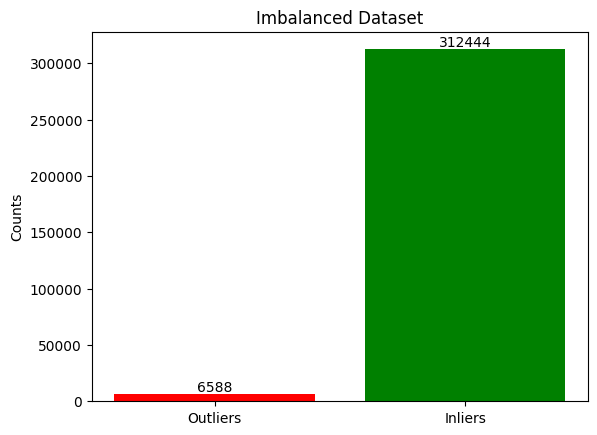

In [20]:
%matplotlib inline 
bars = plt.bar(level_counts.index, level_counts.values, color = ['green', 'red'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontsize=10, color='black')
# plt.xlabel("Imbalanced dataset")
plt.ylabel("Counts")
plt.title("Imbalanced Dataset")
plt.xticks(level_counts.index, ['Inliers', "Outliers"])
plt.show()

# Balancing the data set with under sampling.

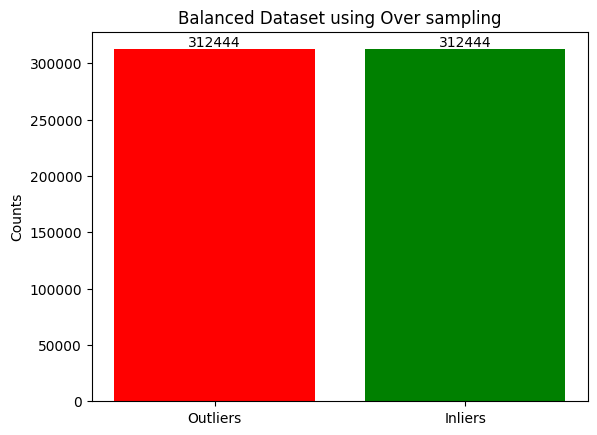

In [36]:
Outliers_training_d = Outliers.sample(level_counts.values[0], replace = True)
Outliers_training_d
df_training_d = pd.concat([Outliers_training_d, Inliers], axis = 0) # training data-set
df_training_d.shape

level_counts_d = df_training_d['LABEL'].value_counts()
%matplotlib inline 
bars = plt.bar(level_counts_d.index, level_counts_d.values, color = ['red', 'green'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontsize=10, color='black')
# plt.xlabel("Imbalanced dataset")
plt.ylabel("Counts")
plt.title("Balanced Dataset using Over sampling")
plt.xticks(level_counts.index, ['Inliers', "Outliers"])
plt.show()



# Trainign model in Over_sampling balanced data set 

In [38]:
# final dataset

df_training_d = df_training_d.dropna(axis=1)
df_training_d
df_t_d = df_training_d[['Z_PIPE', 'ZWARNING', 'Z_PCA', 'ZWARN_PCA', 'DELTACHI2_PCA',
       'Z_HALPHA', 'ZWARN_HALPHA', 'DELTACHI2_HALPHA', 'Z_HBETA',
       'ZWARN_HBETA', 'DELTACHI2_HBETA', 'Z_MGII', 'ZWARN_MGII',
       'DELTACHI2_MGII', 'Z_CIII', 'ZWARN_CIII', 'DELTACHI2_CIII', 'Z_CIV',
       'ZWARN_CIV', 'DELTACHI2_CIV', 'Z_LYA', 'ZWARN_LYA', 'DELTACHI2_LYA',
       'Z_LYAWG', 'BAL_PROB', 'BI_CIV', 'AI_CIV',
       'BI_SIIV', 'AI_SIIV',
       'LABEL']]
X, y = df_t_d.iloc[:,:-1], df_t_d.iloc[:,-1]
from sklearn.model_selection import train_test_split 
X_train_test, X_val, y_train_test, y_val = train_test_split(X, y, test_size = 0.15)

In [39]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits = 4, shuffle =True, random_state = 42)
kf

KFold(n_splits=4, random_state=42, shuffle=True)

In [40]:
df_training_d.iloc[:, :10]

,Z_PIPE,ZWARNING,Z_PCA,ZWARN_PCA,DELTACHI2_PCA,Z,Z_HALPHA,ZWARN_HALPHA,DELTACHI2_HALPHA,Z_HBETA
70843,1.665327,0,1.157549,0,124.373526,1.110,-1.0,7682,0.0,-1.0
198118,3.402716,64,1.607100,0,2211.769286,1.605,-1.0,7682,0.0,-1.0
75725,4.380836,4,1.348030,0,45.684040,1.351,-1.0,7682,0.0,-1.0
234767,4.057529,4,1.223875,0,178.424696,1.230,-1.0,7682,0.0,-1.0
26438,2.953096,4,2.121533,0,154.352153,2.120,-1.0,7682,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...
319027,2.185666,0,2.181776,0,6389.049799,2.205,-1.0,7682,0.0,-1.0
319028,2.415660,0,2.412447,0,2715.918250,2.415,-1.0,7682,0.0,-1.0
319029,2.449493,0,2.447446,0,12948.259371,2.452,-1.0,7682,0.0,-1.0
319030,3.114191,0,3.106480,0,13097.088163,3.109,-1.0,7682,0.0,-1.0


In [41]:
val_scores = []
test_scores = []

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter= 2000000000000)

for train_index, test_index in kf.split(X_train_test):
    X_train_fold, X_test_fold = X_train_test.iloc[train_index], X_train_test.iloc[test_index]
    y_train_fold, y_test_fold = y_train_test.iloc[train_index], y_train_test.iloc[test_index]
    model.fit(X_train_fold, y_train_fold)
    
    # evaluation on validation set 
    
    val_score = model.score(X_test_fold, y_test_fold)
    val_scores.append(val_score)
    
    # Evaluation on test set 
    
    test_score = model.score(X_val, y_val)
    test_scores.append(test_score)


print(f"mean_val_score = {np.mean(val_scores)}")
print(f"mean_test_score = {np.mean(test_scores)}")

mean_val_score = 0.8275829634093123
mean_test_score = 0.828914801459449


In [42]:
scores_data = {
    'Score_Type': ['Validation_Score', 'Test_Score'],
    'Mean_Score': [np.mean(val_scores), np.mean(test_scores)]
}

scores_df = pd.DataFrame(scores_data)
scores_df

,Score_Type,Mean_Score
0,Validation_Score,0.827583
1,Test_Score,0.828915


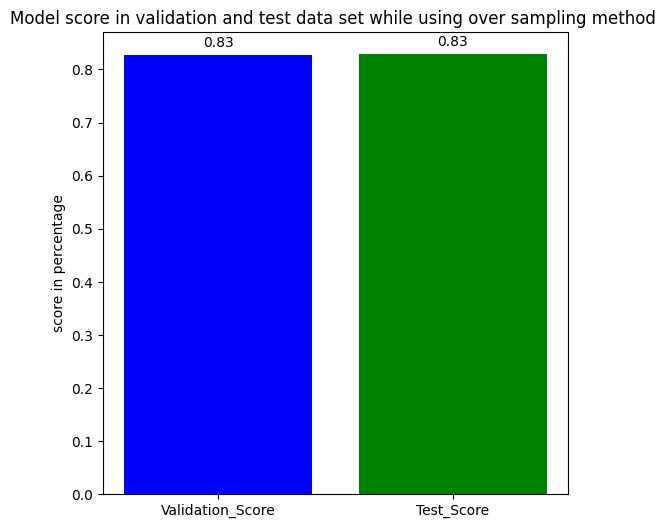

In [43]:
%matplotlib inline 
plt.figure(figsize =(6,6))
bars = plt.bar(scores_df['Score_Type'], scores_df['Mean_Score'],color= ['b', 'g'] )
plt.title('Model score in validation and test data set while using over sampling method ')
plt.ylabel('score in percentage')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()


In [44]:
def feature_weightage(Coefficient, feature_name):
    importance = (
        pd.DataFrame(
    
        { 
         "Model_Features": feature_name,  
         "Coefficient" : Coefficient
        }  
    
    )
    .sort_values("Coefficient", ascending = False)\
    .style.bar(color =['red','green'], align ='zero')
    )
    
    return importance

In [45]:
feature_weightage(model.coef_[0],X_val.columns)

,Model_Features,Coefficient
23,Z_LYAWG,0.481031
11,Z_MGII,0.272862
14,Z_CIII,0.247363
17,Z_CIV,0.234828
2,Z_PCA,0.211164
5,Z_HALPHA,0.030831
20,Z_LYA,0.026340
8,Z_HBETA,0.017736
10,DELTACHI2_HBETA,0.000688
25,BI_CIV,0.000400


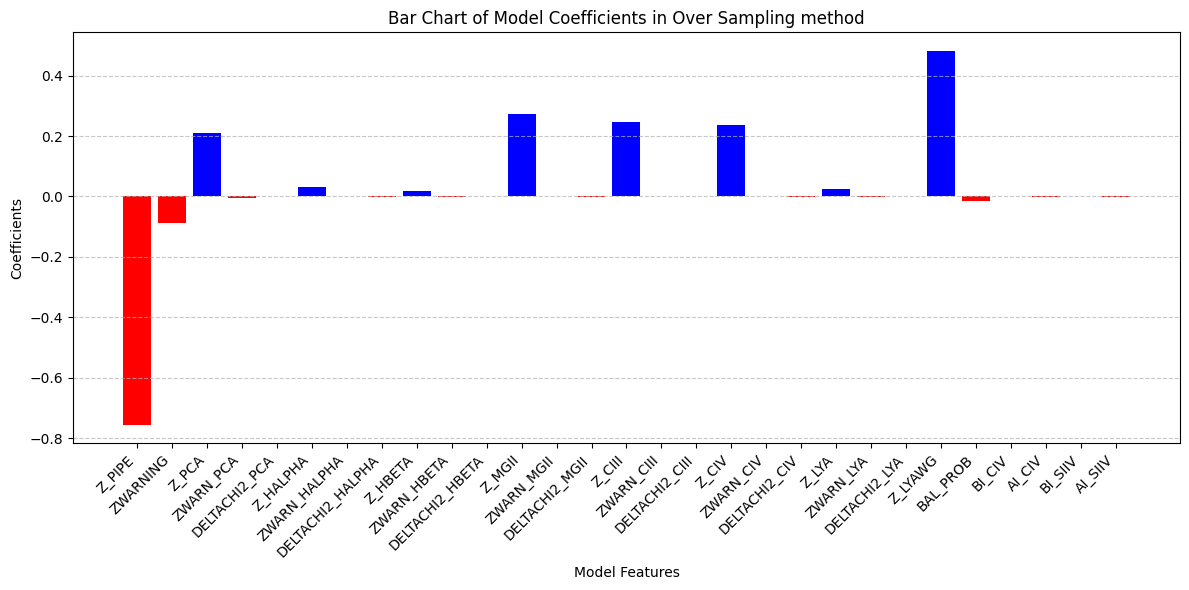

In [46]:
colors = ['red' if c < 0 else 'blue' for c in model.coef_[0]]
plt.figure(figsize=(12, 6))
plt.bar(X_val.columns, model.coef_[0], color = colors)
plt.xlabel('Model Features')
plt.ylabel('Coefficients')
plt.title('Bar Chart of Model Coefficients in Over Sampling method')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Model predictions in real time data


In [32]:
df[df['Z_VI']<=0]

,Z_PIPE,ZWARNING,Z_PCA,ZWARN_PCA,DELTACHI2_PCA,Z,Z_HALPHA,ZWARN_HALPHA,DELTACHI2_HALPHA,Z_HBETA,...,ERR_BI_CIV,AI_CIV,ERR_AI_CIV,BI_SIIV,ERR_BI_SIIV,AI_SIIV,Z_VI,SOURCE_Z,Z_VI-Z_PIPE,LABEL


In [42]:
model.coef_[0]

array([-7.97365483e-01, -8.52012517e-02,  1.59522548e-01, -4.98028633e-03,
        3.31940005e-05,  2.55466042e-01,  2.40110055e-02,  1.94963451e-06,
       -2.00691065e-04,  9.68188903e-03, -1.09144091e-04,  5.12460028e-04,
        2.29997082e-01,  8.21601043e-05, -8.88428808e-05,  1.94650314e-01,
        8.58083125e-05,  3.93692764e-05,  1.85086030e-01,  5.31982532e-05,
       -1.18545722e-04,  4.10886437e-05, -4.59594770e-05,  1.15727091e-04,
        5.03114702e-01, -2.05422922e-02,  3.44688052e-04, -2.59120774e-04,
        2.40893481e-05, -5.44777152e-04])

# Model prediction in the data set Z_VI <=0.002

In [45]:
df_p1 = df_0[df_0['Z_VI']<=0]
df_p11 = df_p1['Z_PIPE', 'ZWARNING', 'Z_PCA', 'ZWARN_PCA', 'DELTACHI2_PCA', 'Z',
       'Z_HALPHA', 'ZWARN_HALPHA', 'DELTACHI2_HALPHA', 'Z_HBETA',
       'ZWARN_HBETA', 'DELTACHI2_HBETA', 'Z_MGII', 'ZWARN_MGII',
       'DELTACHI2_MGII', 'Z_CIII', 'ZWARN_CIII', 'DELTACHI2_CIII', 'Z_CIV',
       'ZWARN_CIV', 'DELTACHI2_CIV', 'Z_LYA', 'ZWARN_LYA', 'DELTACHI2_LYA',
       'Z_LYAWG', 'BAL_PROB', 'BI_CIV', 'AI_CIV', 'BI_SIIV', 'AI_SIIV']
df_p111 = df_p11.to_pandas()
df_p111
prediction_1 = model.predict(df_p111)
len(prediction_1)
In_liers = print(np.sum(prediction_1==1))
Out_liers = print(np.sum(prediction_1 ==0))

315462
112555


In [46]:
df_p2= df_con1[df_con1['Z_VI']<0]
df_p22 = df_p2['Z_PIPE', 'ZWARNING', 'Z_PCA', 'ZWARN_PCA', 'DELTACHI2_PCA', 'Z',
       'Z_HALPHA', 'ZWARN_HALPHA', 'DELTACHI2_HALPHA', 'Z_HBETA',
       'ZWARN_HBETA', 'DELTACHI2_HBETA', 'Z_MGII', 'ZWARN_MGII',
       'DELTACHI2_MGII', 'Z_CIII', 'ZWARN_CIII', 'DELTACHI2_CIII', 'Z_CIV',
       'ZWARN_CIV', 'DELTACHI2_CIV', 'Z_LYA', 'ZWARN_LYA', 'DELTACHI2_LYA',
       'Z_LYAWG', 'BAL_PROB', 'BI_CIV', 'AI_CIV', 'BI_SIIV', 'AI_SIIV']
df_p222 = df_p22.to_pandas()
prediction_2 = model.predict(df_p222)
len(prediction_2)
In__liers = print(np.sum(prediction_2 ==1))
Out__liers = print(np.sum(prediction_2 ==0))

174
139


In [48]:
df_p1 = df_0[df_0['Z_VI']<=0]
df_p1

Z_PIPE,ZWARNING,Z_PCA,ZWARN_PCA,DELTACHI2_PCA,Z,Z_HALPHA,ZWARN_HALPHA,DELTACHI2_HALPHA,Z_HBETA,ZWARN_HBETA,DELTACHI2_HBETA,Z_MGII,ZWARN_MGII,DELTACHI2_MGII,Z_CIII,ZWARN_CIII,DELTACHI2_CIII,Z_CIV,ZWARN_CIV,DELTACHI2_CIV,Z_LYA,ZWARN_LYA,DELTACHI2_LYA,Z_LYAWG,BAL_PROB,BI_CIV,ERR_BI_CIV,AI_CIV,ERR_AI_CIV,BI_SIIV,ERR_BI_SIIV,AI_SIIV,Z_VI,SOURCE_Z,Z-Z_PIPE
float64,int32,float64,int64,float64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,bytes12,float64
0.8454347848892212,0,0.845751479344974,0,16996.66972831516,0.8454347848892212,-1.0,7682,0.0,0.8436375149058963,0,156.43772375163678,0.8428504859071788,0,750.8834989041113,0.8940224387238764,2050,21.324610028391675,-1.0,7682,0.0,-1.0,7682,0.0,0.84575146,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,PIPE,0.0
2.035491466522217,0,2.0344430019020106,0,522.7567574737077,2.035491466522217,-1.0,7682,0.0,-1.0,7682,0.0,2.0517068015079523,0,36.65111428584561,2.0140677564448497,0,17.77954054107221,2.0079091130528393,0,94.93493230811634,2.037936700312481,0,59.69074975107185,2.030835,0.9,0.0,0.0,143.46597290039062,6.538216590881348,0.0,0.0,0.0,-1.0,PIPE,0.0
1.5742274522781372,0,1.5748324669819411,0,395.17112356819234,1.5742274522781372,-1.0,7682,0.0,-1.0,7682,0.0,1.571394626776076,0,51.26856655958335,1.57383165321738,0,28.665405762936928,1.5893603661422095,0,121.69651782476126,-1.0,7682,0.0,1.5748324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,PIPE,0.0
1.7705516815185547,0,1.7711350379809114,0,410.12555811197035,1.7705516815185547,-1.0,7682,0.0,-1.0,7682,0.0,1.7702794429839241,0,21.87843562643343,1.7558669284907311,0,22.79849258331683,1.7673499491247613,0,94.47670636372106,-1.0,7682,0.0,1.7716389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,PIPE,0.0
2.024146318435669,0,2.0259091237511564,0,26576.813852902626,2.024146318435669,-1.0,7682,0.0,-1.0,7682,0.0,2.036802201236187,0,712.5588206441782,2.0309983965987133,0,673.5819974202324,2.021040762631008,0,3658.945308889662,2.032103120491116,0,1380.504531362969,2.0266654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,PIPE,0.0
2.102771282196045,0,2.101496527515934,0,1110.8580499737545,2.102771282196045,-1.0,7682,0.0,-1.0,7682,0.0,2.097295616972638,0,30.41741018780067,2.083914211754335,0,73.24283839544694,2.0861203626983373,0,247.91621727182837,2.1022567538234713,0,252.6513803056074,2.0993412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,PIPE,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.019596576690674,0,2.0190560241833455,0,1755.7813595209136,2.019596576690674,-1.0,7682,0.0,-1.0,7682,0.0,2.0283263949484365,0,36.72574693072221,2.0209172391554344,0,56.826011656349124,2.015533957407643,0,457.5942410577496,2.023426385236177,0,247.76095906015303,2.020022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,PIPE,0.0
1.3559542894363403,0,1.3556378010315973,0,1171.580746876155,1.3559542894363403,-1.0,7682,0.0,-1.0,7682,0.0,1.3507096065781359,0,50.32103524325913,1.3553357026527406,0,258.5170535603262,1.3550840043085,0,220.28484003454173,-1.0,7682,0.0,1.3556378,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,PIPE,0.0
